In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../data/train.csv')
test= pd.read_csv('../data/test.csv')

# trying to see if test set differs from train set

In [3]:
pd.DataFrame([train.count(),test.count()], index=['train_set', 'test_set']).T

,train_set,test_set
Id,1460.0,1459.0
MSSubClass,1460.0,1459.0
MSZoning,1460.0,1455.0
LotFrontage,1201.0,1232.0
LotArea,1460.0,1459.0
Street,1460.0,1459.0
Alley,91.0,107.0
LotShape,1460.0,1459.0
LandContour,1460.0,1459.0
Utilities,1460.0,1457.0


it seems there is no big difference in null values.
lets clean some sparse variables. every variable below 10% will be cut out.

In [4]:
cut_out=train.columns[train.count().values<0.1*len(train)].tolist()
cut_out

['Alley', 'PoolQC', 'MiscFeature']

In [432]:
train.shape, test.shape

((1460, 122), (1459, 77))

In [6]:
train.drop(cut_out,axis=1,inplace=True)
test.drop(cut_out,axis=1,inplace=True)

In [7]:
train.shape, test.shape

((1460, 78), (1459, 77))

next step we will check difference in distibutions

In [8]:
numeric_c=[]
cat_c=[]
for c in train.columns.tolist():
    if train[c].dtypes=='int64' or train[c].dtypes=='float64':
        numeric_c.append(c)
    else:
        cat_c.append(c)
     

removing 2 variables- Id is not a variable and SalePrice is not in test set

In [9]:
numeric_c.remove('Id')
numeric_c.remove('SalePrice')

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GU

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


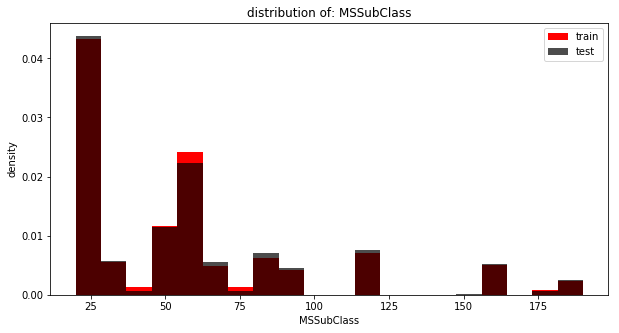

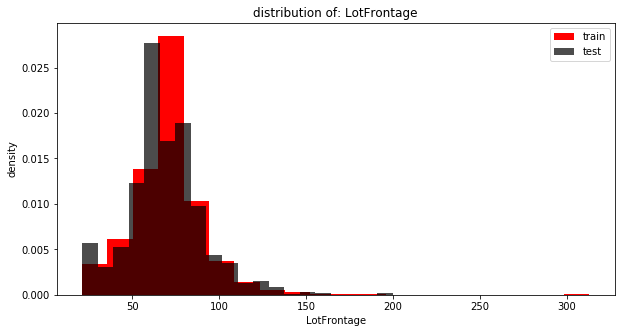

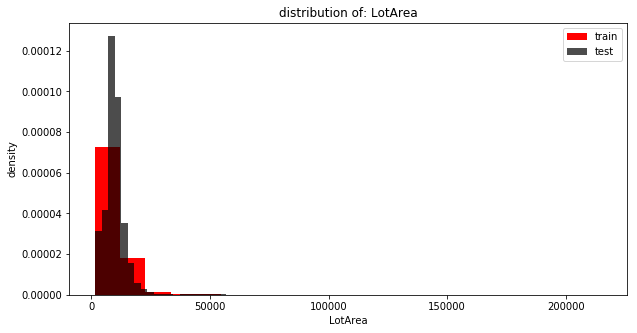

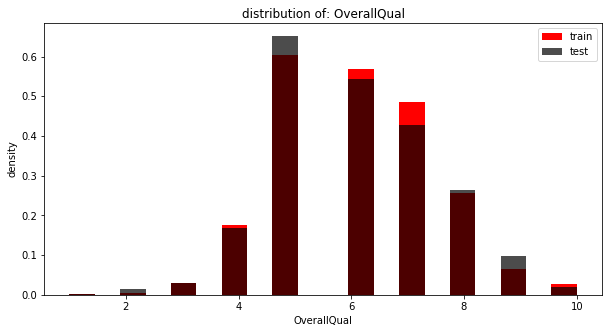

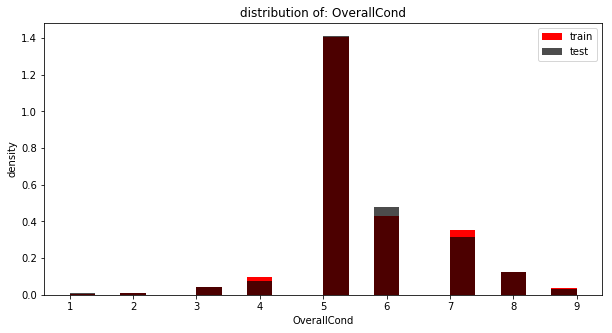

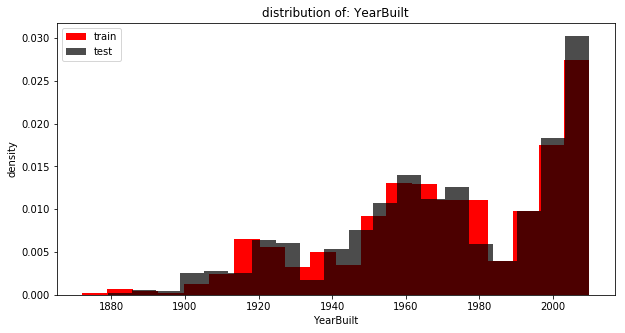

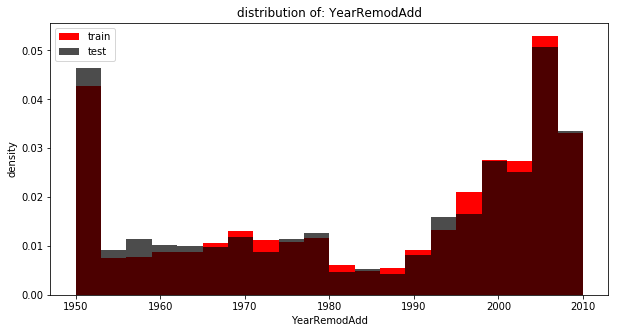

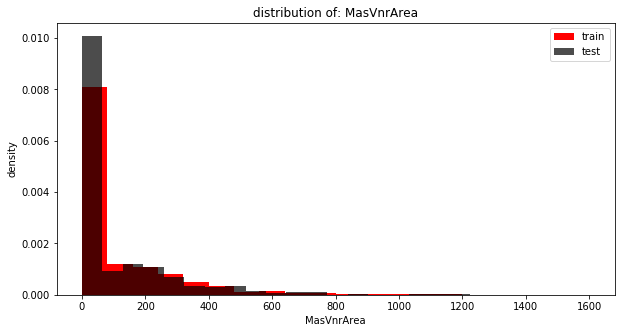

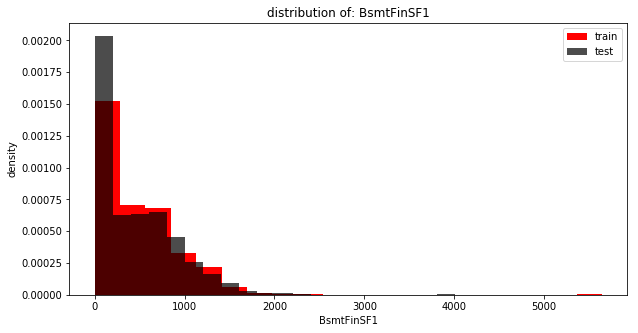

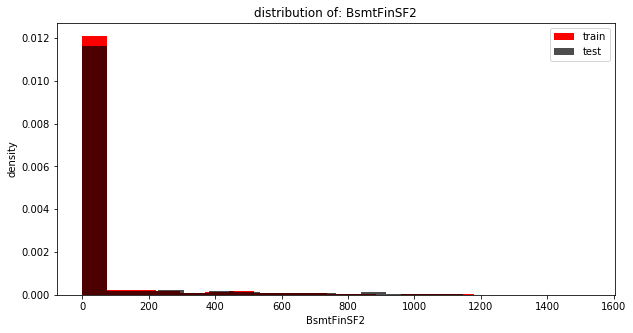

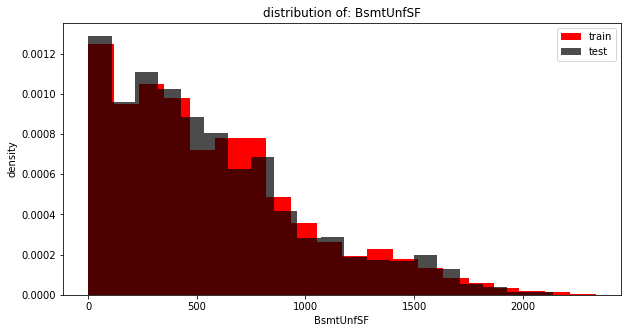

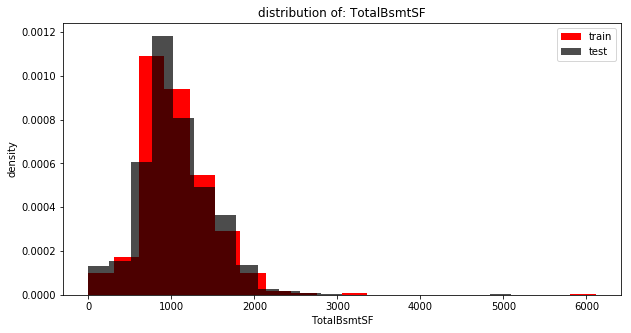

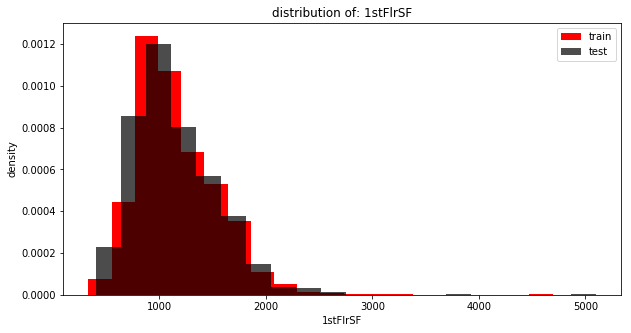

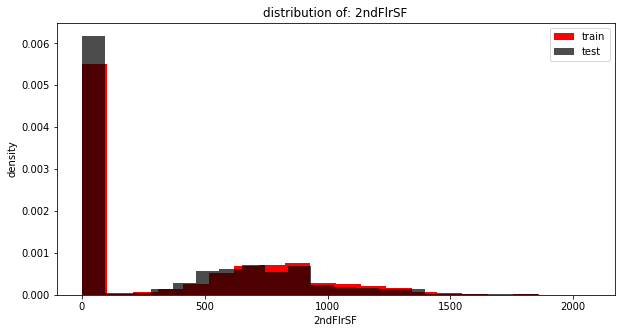

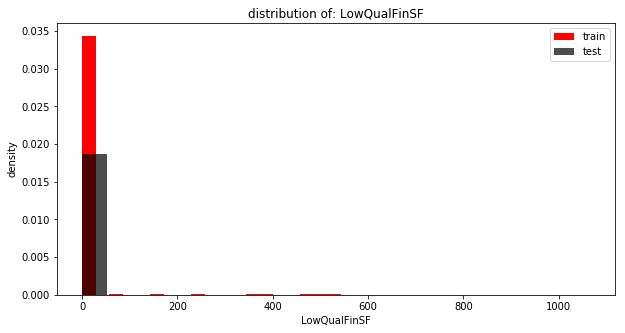

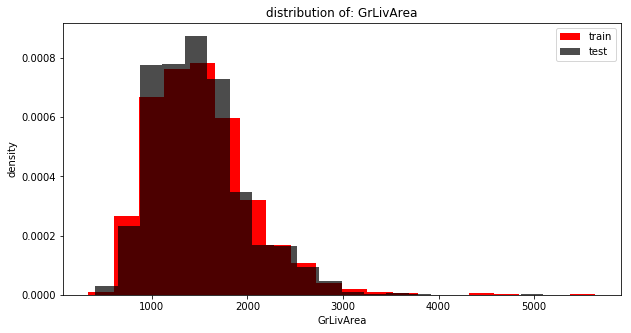

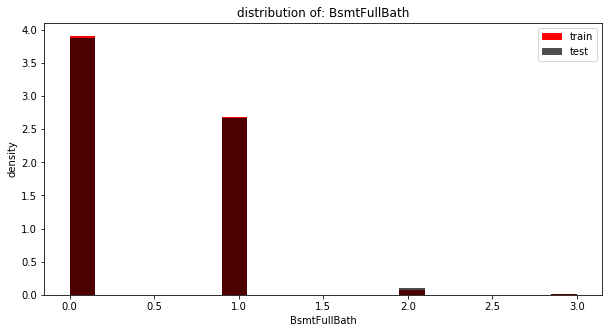

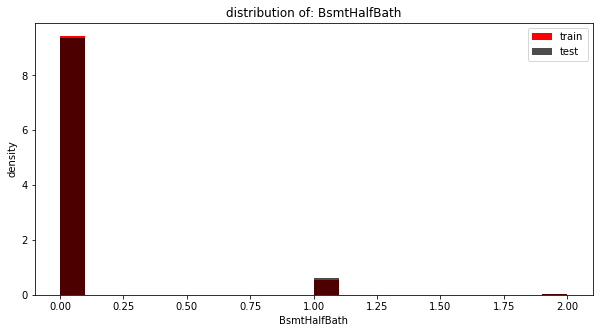

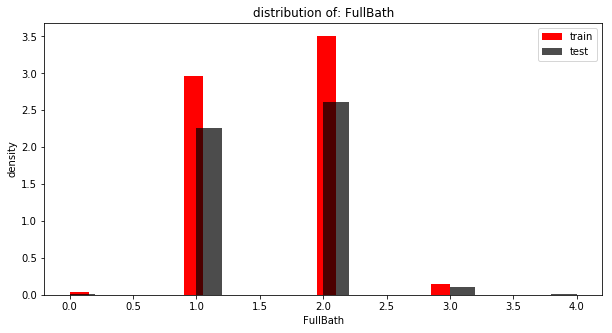

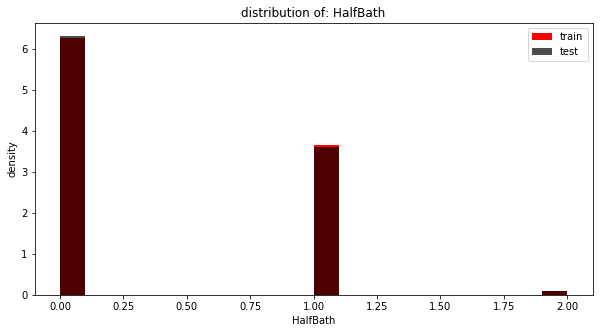

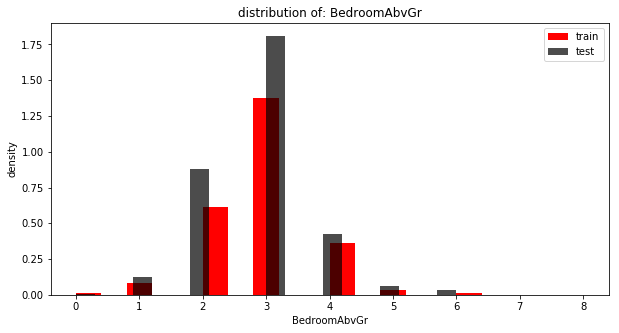

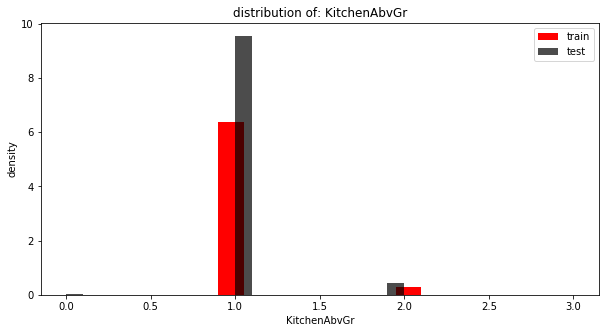

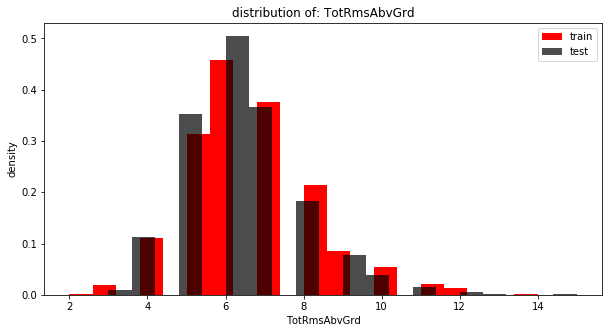

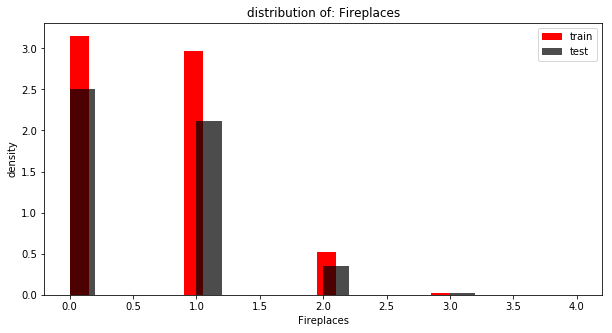

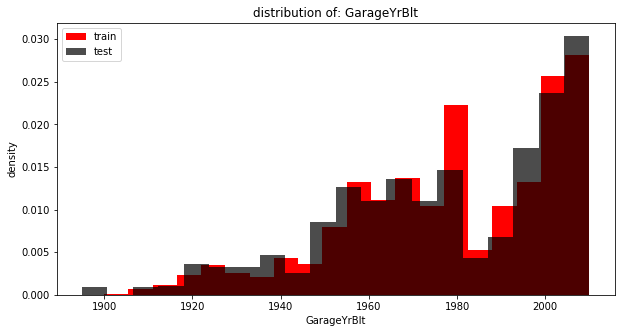

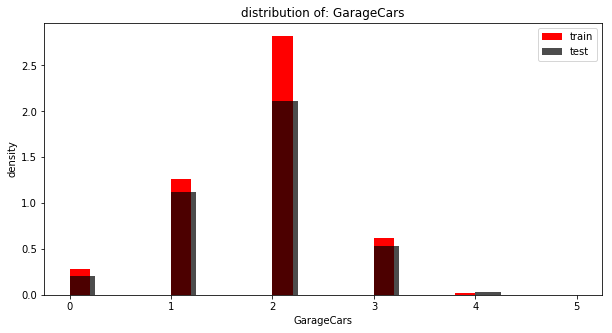

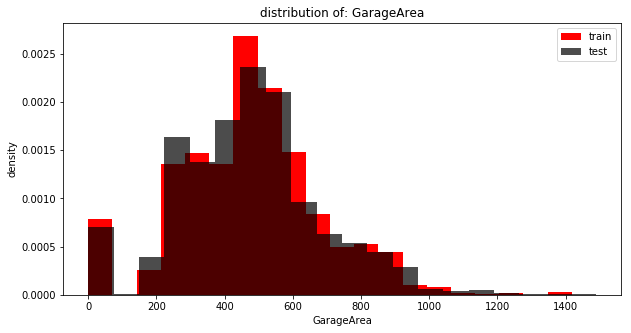

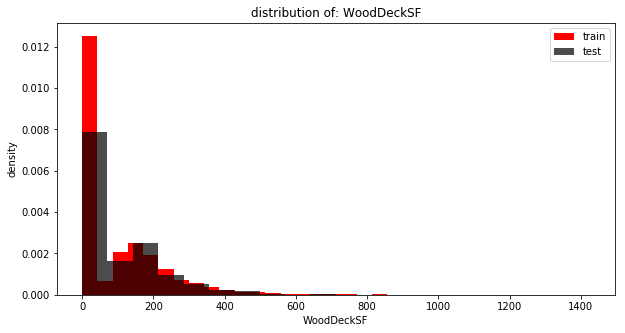

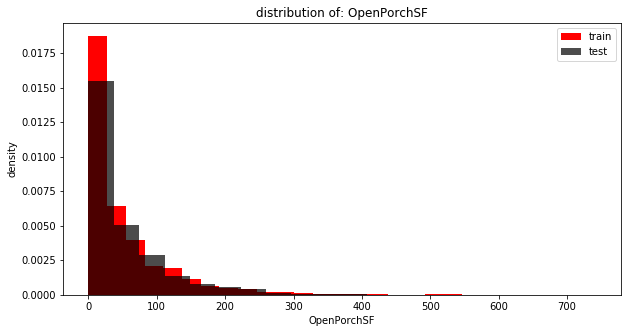

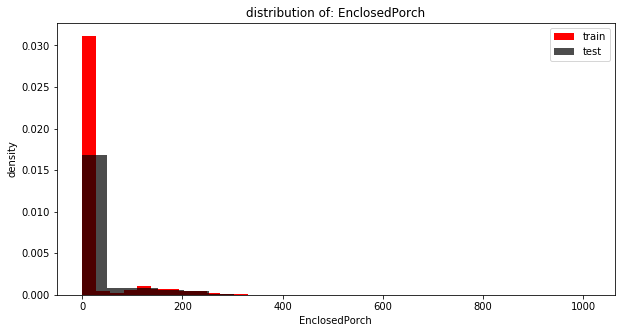

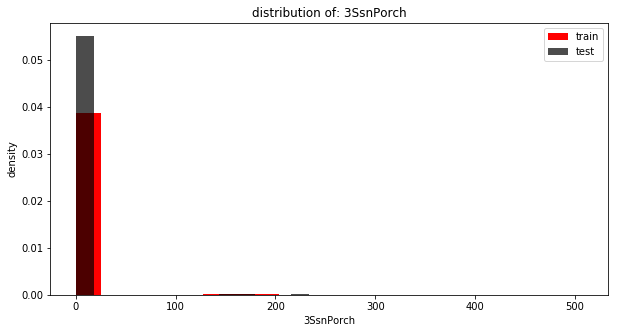

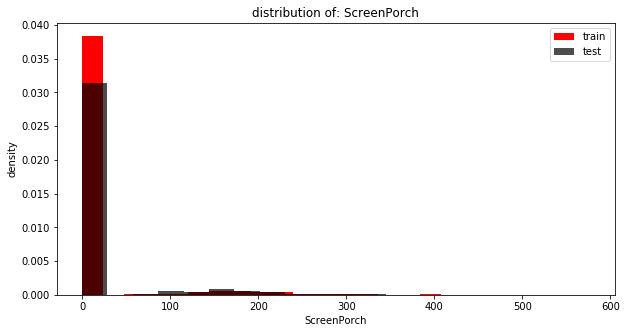

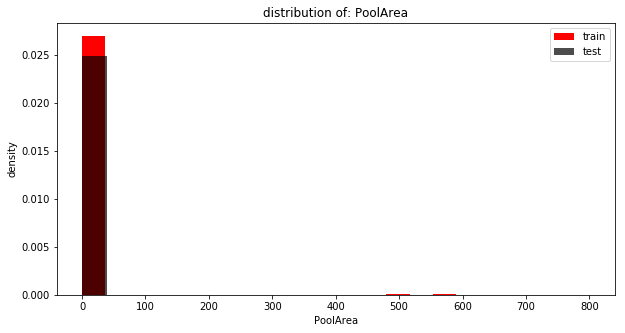

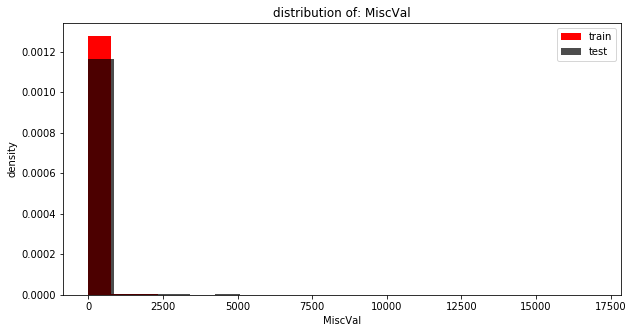

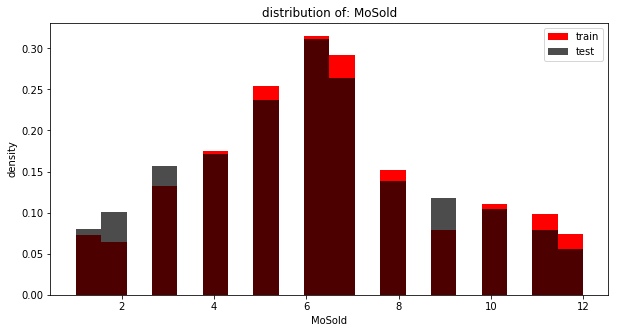

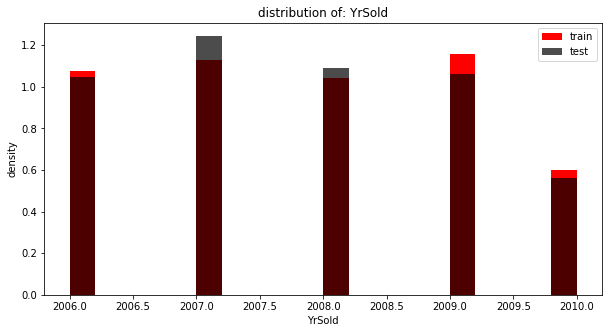

In [433]:
for c in numeric_c:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
    ax.hist(train[c],density=True, bins=20, color='r', label='train')
    ax.hist(test[c],density=True, bins=20, color='k', alpha=0.7, label='test')
    ax.set_title('distribution of: '+c )
    ax.set_xlabel(c)
    ax.set_ylabel('density')
    ax.legend(loc=0)
    fig.show()

no major diff. but still:

vars with some diff's in dist:
#lot area- train is *smaller* than test 
#basement_fin_sf1- train is *bigger* than test
#2nd floor sf- test have more 0 values
#low quality fin sf- train has more 0 values
test set has garageYrBlt==2200
check miscval

In [ ]:
train.MiscVal.describe()

In [ ]:
test.MiscVal.describe()

In [ ]:
test.GarageYrBlt.describe()

In [ ]:
test.YrSold.describe()

In [22]:
fix_year=test.loc[test.GarageYrBlt>2010].GarageYrBlt.index.values.tolist()

In [31]:
test.loc[fix_year,'GarageYrBlt']=np.nan

In [ ]:
for c in cat_c:
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=train[c], data=train)
    ax.set_title('distribution in train set of: '+c)
    ax.set_ylabel('no of sample')
    plt.subplot(1,2,2)
    ax2 = sns.countplot(x=test[c], data=test)
    ax2.set_title('distribution in test set of: '+c)
    ax2.set_ylabel('no of sample')
    plt.xticks(rotation=45)
    fig.show()

in general theres no diff. thats good!

In [33]:
def make_dummies_conditional_on_len(train,c):
    df=train.groupby(c).Id.count()
    for i in df.index.tolist():
        if df.loc[i]>=100:
            name=str(c)+'_'+str(i)
            train[name]=np.where(train[c]==i,1,0)
    train.drop(c,axis=1, inplace=True)

In [34]:
for c in cat_c:
    make_dummies_conditional_on_len(train,c)

In [35]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,1,1,0,0,1,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,1,1,0,0,1,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,1,1,0,0,1,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1,1,1,0,0,1,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,1,1,0,0,1,0,1,0


In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [37]:
ctk=train.columns.tolist()
ctk.remove("Id")
ctk.remove('SalePrice')
ctk

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_Reg',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Condition1_Norm',
 'Condition2_Norm',
 'BldgType_1Fam',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 

In [39]:
X=train[ctk]
y=train.SalePrice

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
linReg = linear_model.LinearRegression().fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

we have null values. lets clean them up

In [58]:
columns_to_clean=train.isnull().any().tolist()

In [62]:
train.loc[:,columns_to_clean].columns.tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

LotFrontage

In [67]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [65]:
train[train.LotFrontage.isnull()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,1,1,1,0,0,1,0,1,0
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,1,1,1,1,0,0,1,0,1,0
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,1,1,1,0,0,1,0,1,0
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,1,1,1,0,0,1,0,1,0
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,1,1,1,1,1,0,1,0,1,0
31,32,20,NaN,8544,5,6,1966,2006,0.0,0,...,1,1,1,1,1,0,1,0,1,0
42,43,85,NaN,9180,5,7,1983,1983,0.0,747,...,0,1,0,1,1,0,1,0,1,0
43,44,20,NaN,9200,5,6,1975,1980,0.0,280,...,1,1,1,1,1,0,1,0,1,0
50,51,60,NaN,13869,6,6,1997,1997,0.0,182,...,0,1,1,1,0,0,1,0,1,0
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,0,1,1,1,0,0,1,0,1,0


if i understand correctly, this missing values should be replaced with the mean of this variable

In [72]:
LotFrontage_to_fix=train[train.LotFrontage.isnull()].index.tolist()

In [74]:
train.loc[LotFrontage_to_fix,'LotFrontage']=train.LotFrontage.mean()

In [75]:
train.loc[LotFrontage_to_fix,'LotFrontage']

7       70.049958
12      70.049958
14      70.049958
16      70.049958
24      70.049958
31      70.049958
42      70.049958
43      70.049958
50      70.049958
64      70.049958
66      70.049958
76      70.049958
84      70.049958
95      70.049958
100     70.049958
104     70.049958
111     70.049958
113     70.049958
116     70.049958
120     70.049958
126     70.049958
131     70.049958
133     70.049958
136     70.049958
147     70.049958
149     70.049958
152     70.049958
153     70.049958
160     70.049958
166     70.049958
          ...    
1300    70.049958
1301    70.049958
1309    70.049958
1312    70.049958
1318    70.049958
1321    70.049958
1342    70.049958
1346    70.049958
1348    70.049958
1354    70.049958
1356    70.049958
1357    70.049958
1358    70.049958
1362    70.049958
1365    70.049958
1368    70.049958
1373    70.049958
1381    70.049958
1383    70.049958
1396    70.049958
1407    70.049958
1417    70.049958
1419    70.049958
1423    70.049958
1424    70

MasVnrArea-Masonry veneer area in square feet

In [77]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [85]:
train[train.MasVnrArea.isnull()]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,Fence_MnPrv,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
234,235,60,70.049958,7851,6,5,2002,2002,NaN,625,...,0,1,1,1,0,0,1,0,1,0
529,530,20,70.049958,32668,6,3,1957,1975,NaN,1219,...,0,1,1,1,0,0,1,0,0,0
650,651,60,65.000000,8125,7,6,2007,2007,NaN,0,...,0,1,1,1,0,0,1,0,1,0
936,937,20,67.000000,10083,7,5,2003,2003,NaN,833,...,0,1,1,1,0,0,1,0,1,0
973,974,20,95.000000,11639,7,5,2007,2008,NaN,0,...,0,1,1,1,0,1,0,0,0,1
977,978,120,35.000000,4274,7,5,2006,2007,NaN,1106,...,0,1,1,1,0,1,0,0,0,1
1243,1244,20,107.000000,13891,10,5,2006,2006,NaN,1386,...,0,1,1,1,0,1,0,0,0,1
1278,1279,60,75.000000,9473,8,5,2002,2002,NaN,804,...,0,1,1,1,0,0,1,0,1,0


it seems this var should be equal to 0 in this case

In [86]:
MasVnrArea_to_fix=train[train.MasVnrArea.isnull()].index.tolist()
train.loc[MasVnrArea_to_fix,'MasVnrArea']=0
train.loc[MasVnrArea_to_fix,'MasVnrArea']

234     0.0
529     0.0
650     0.0
936     0.0
973     0.0
977     0.0
1243    0.0
1278    0.0
Name: MasVnrArea, dtype: float64

lastly we have GarageYrBlt which is "Year garage was built". i suspect the missing values are because theres no garage

In [92]:
train[train.GarageYrBlt.isnull()].GarageArea.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

the missing values are only in casses where GarageArea==0 so theres no garage! therefor i will change their values to mean fo garageYrBlt

In [97]:
GarageYrBlt_to_fix=train[train.GarageYrBlt.isnull()].index.tolist()
train.loc[GarageYrBlt_to_fix,'GarageYrBlt']=train.GarageYrBlt.mean().round(0)
train.loc[GarageYrBlt_to_fix,'GarageYrBlt']

39      1979.0
48      1979.0
78      1979.0
88      1979.0
89      1979.0
99      1979.0
108     1979.0
125     1979.0
127     1979.0
140     1979.0
148     1979.0
155     1979.0
163     1979.0
165     1979.0
198     1979.0
210     1979.0
241     1979.0
250     1979.0
287     1979.0
291     1979.0
307     1979.0
375     1979.0
386     1979.0
393     1979.0
431     1979.0
434     1979.0
441     1979.0
464     1979.0
495     1979.0
520     1979.0
         ...  
954     1979.0
960     1979.0
968     1979.0
970     1979.0
976     1979.0
1009    1979.0
1011    1979.0
1030    1979.0
1038    1979.0
1096    1979.0
1123    1979.0
1131    1979.0
1137    1979.0
1143    1979.0
1173    1979.0
1179    1979.0
1218    1979.0
1219    1979.0
1234    1979.0
1257    1979.0
1283    1979.0
1323    1979.0
1325    1979.0
1326    1979.0
1337    1979.0
1349    1979.0
1407    1979.0
1449    1979.0
1450    1979.0
1453    1979.0
Name: GarageYrBlt, Length: 81, dtype: float64

lets try the regression again

In [98]:
X=train[ctk]
y=train.SalePrice
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
linReg = linear_model.LinearRegression().fit(x_train,y_train)

In [99]:
y_pred=linReg.predict(x_test)

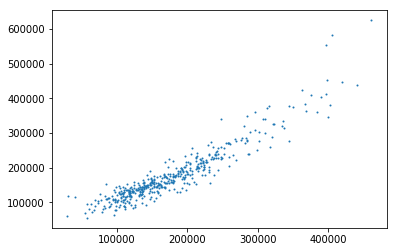

In [103]:
plt.scatter(y_pred,y_test, s=1)

In [104]:
linReg.score(x_test, y_test)

0.8743027750883227

In [106]:
from sklearn.metrics import mean_squared_error
log_pred=np.log(y_pred)
log_test=np.log(y_test)

mse = mean_squared_error(log_pred,log_test)

rmse = np.sqrt(mse)

rmse

0.17781829719111097

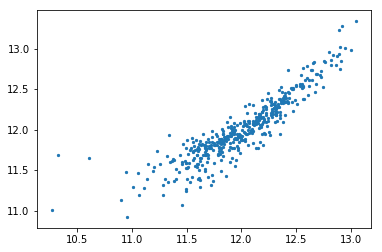

In [108]:
plt.scatter(log_pred,log_test, s=5)

In [111]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(y_train,x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:51:56   Log-Likelihood:                -11985.
No. Observations:                1022   AIC:                         2.421e+04
Df Residuals:                     904   BIC:                         2.479e+04
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -29.2165     87.405     -0.334      0.738    -200.756     142.323
LotFrontage            -210.0884     63.275     -3.320      0.001    -334.271     -85.906
LotArea                   0.3645      0.138      2.643      0.008       0.094       0.635
OverallQual            1.198e+04   1508.525      7.941      0.000    9018.493    1.49e+04
OverallCond            5934.8540   1367.513      4.340      0.000    3250.984    8618.724
YearBuilt               118.5026    107.358      1.104      0.270     -92.198     329.203
YearRemodAdd            -62.7936     92.368     -0.680      0.497    -244.074     118.487
MasVnrArea               27.0402      8.736      3.095      0.002       9.894      44.186
BsmtFinSF1               -7.6134      3.960     -1.923      0.055     -15.385       0.159
BsmtFinSF2                6.8545      8.352      0.821      0.412      -9.537      23.246
BsmtUnfSF                -4.4533      4.181     -1.065      0.287     -12.659       3.752
TotalBsmtSF              -5.2122      5.364     -0.972      0.331     -15.740       5.315
1stFlrSF                 16.3595      8.062      2.029      0.043       0.537      32.182
2ndFlrSF                 29.0498      7.889      3.683      0.000      13.568      44.532
LowQualFinSF            -10.0264     17.383     -0.577      0.564     -44.142      24.089
GrLivArea                35.3828      6.984      5.066      0.000      21.676      49.089
BsmtFullBath           1.022e+04   3167.981      3.225      0.001    3998.161    1.64e+04
BsmtHalfBath           3824.0622   4823.858      0.793      0.428   -5643.201    1.33e+04
FullBath               4558.0319   3485.851      1.308      0.191   -2283.271    1.14e+04
HalfBath               3308.1138   3311.296      0.999      0.318   -3190.608    9806.835
BedroomAbvGr          -1118.5379   2043.320     -0.547      0.584   -5128.741    2891.665
KitchenAbvGr          -8600.7241   7492.463     -1.148      0.251   -2.33e+04    6103.922
TotRmsAbvGrd           1471.1359   1504.719      0.978      0.328   -1482.014    4424.285
Fireplaces             8148.1380   3254.678      2.504      0.012    1760.534    1.45e+04
GarageYrBlt            -105.6796     94.545     -1.118      0.264    -291.234      79.874
GarageCars             1.754e+04   3522.982      4.980      0.000    1.06e+04    2.45e+04
GarageArea                3.5708     12.133      0.294      0.769     -20.241      27.382
WoodDeckSF               25.4021      9.626      2.639      0.008       6.511      44.293
OpenPorchSF             -14.2284     17.533     -0.812      0.417     -48.638      20.181
EnclosedPorch            17.3502     20.711      0.838      0.402     -23.296      57.997
3SsnPorch                63.6057     38.565      1.649      0.099     -12.081     139.292
ScreenPorch            

we can see two very important things:
1. there are a lot of features that seems un-correlated with saleprice. we should understand why and if we can "save" them or should just drop them.
2. it seems the variance is changing along the predicted line. we should see how to fix it b.c it break the assumption of residual errors

In [113]:
regressor_OLS.pvalues[regressor_OLS.pvalues>0.5]

MSSubClass               0.738256
LowQualFinSF             0.564216
BedroomAbvGr             0.584231
GarageArea               0.768587
MiscVal                  0.599410
MoSold                   0.620261
YrSold                   0.817421
MSZoning_RM              0.552570
LotShape_IR1             0.526297
LotConfig_Corner         0.863739
HouseStyle_1.5Fin        0.614097
RoofStyle_Gable          0.681631
RoofStyle_Hip            0.779394
Exterior1st_MetalSd      0.815673
Exterior1st_VinylSd      0.852802
Exterior2nd_MetalSd      0.883804
Exterior2nd_Plywood      0.794419
Exterior2nd_VinylSd      0.886419
Exterior2nd_Wd Sdng      0.697808
MasVnrType_BrkFace       0.854483
MasVnrType_Stone         0.756460
BsmtQual_Gd              0.993531
BsmtQual_TA              0.765897
BsmtExposure_Av          0.672789
BsmtExposure_Gd          0.695208
BsmtExposure_Mn          0.547603
BsmtFinType1_ALQ         0.510315
BsmtFinType1_Rec         0.578060
Heating_GasA             0.962715
HeatingQC_Ex  

lets start really explore the data!

In [378]:
df=pd.read_csv('../data/train.csv')

it seems MS info is not helping(ie.-MSSubClass, MSZoning_RM and also MSZoning_RL). lets understand why

In [379]:
pd.pivot_table(df,index=["MSSubClass"], columns=["MSZoning"],values=['SalePrice'], aggfunc=['count', 'mean'], margins=True)

count                                       mean  \
           SalePrice                                  SalePrice   
MSZoning     C (all)    FV    RH      RL     RM   All   C (all)   
MSSubClass                                                        
20               2.0  13.0   3.0   508.0   10.0   536   45652.0   
30               2.0   NaN   1.0    33.0   33.0    69   57950.0   
40               NaN   NaN   NaN     2.0    2.0     4       NaN   
45               NaN   NaN   1.0     4.0    7.0    12       NaN   
50               4.0   NaN   1.0    88.0   51.0   144   91044.0   
60               NaN  25.0   NaN   273.0    1.0   299       NaN   
70               1.0   NaN   3.0    30.0   26.0    60   40000.0   
75               NaN   NaN   NaN     6.0   10.0    16       NaN   
80               NaN   NaN   NaN    58.0    NaN    58       NaN   
85               NaN   NaN   NaN    20.0    NaN    20       NaN   
90               NaN   NaN   3.0    43.0    6.0    52       NaN   
120              NaN   5.0   2.0    59.0   21.0    87       NaN   
160              NaN  22.0   NaN    11.0   30.0    63       NaN   
180              NaN   NaN   NaN     NaN   10.0    10       NaN   
190              1.0   NaN   2.0    16.0   11.0    30  133900.0   
All             10.0  65.0  16.0  1151.0  218.0  1460   74528.0   

                                                                        \
                                                                         
MSZoning               FV             RH             RL             RM   
MSSubClass                                                               
20          226289.538462  102966.666667  186467.039370  121327.500000   
30                    NaN   79000.000000   96481.212121   97983.969697   
40                    NaN            NaN  196500.000000  115750.000000   
45                    NaN   76000.000000  110050.000000  112414.285714   
50                    NaN  159434.000000  156277.477273  124698.039216   
60          248558.600000            NaN  239544.457875  135000.000000   
70                    NaN  124533.333333  199808.733333  138403.192308   
75                    NaN            NaN  184750.000000  197050.000000   
80                    NaN            NaN  169736.551724            NaN   
85                    NaN            NaN  147810.000000            NaN   
90                    NaN  144666.666667  132379.906977  136300.000000   
120         226140.000000  157000.000000  210029.491525  172920.952381   
160         164749.318182            NaN  164909.090909  109876.666667   
180                   NaN            NaN            NaN  102300.000000   
190                   NaN  180000.000000  134662.500000  112718.181818   
All         214014.061538  131558.375000  191004.994787  126316.830275   

                           
                           
MSZoning              All  
MSSubClass                 
20          185224.811567  
30           95829.724638  
40          156125.000000  
45          108591.666667  
50          143302.972222  
60          239948.501672  
70          166772.416667  
75          192437.500000  
80          169736.551724  
85          147810.000000  
90          133541.076923  
120         200779.080460  
160         138647.380952  
180         102300.000000  
190         129613.333333  
All         180921.195890

we see high variance but its non linear.

lets keep only cases where there are more then 20 examples (as categorial variable)

work ahead:
1. treating MSSubClass as categorical var.
2. MSSubClass and HouseStyle suppose to be higly correlated
3. YearBuilt and YearRemodAdd mostly should have the same data. maybe we can pass on YearBuilt.
4. ExterQual and ExterCond could be dealt as orderd list.
5. the same with BsmtQual and BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2.
6. a new variable could be a ratio between TotalBsmtSF and other basement var's.
7. HeatingQC as 4 and 5.
8. KitchenQual as 7.
9. Functional also.
10. GarageFinish the same.
11. GarageQual the same.
12. GarageCond the same.
13. Fence the same (but more complicated)
14. MiscFeature might be dropped.
15. MoSold and YrSold might be used to see if there is a time trend.


In [380]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1&2

In [381]:
df.groupby(['MSSubClass','HouseStyle']).Id.count().unstack()

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
MSSubClass,,,,,,,,
20,NaN,NaN,534.0,NaN,NaN,1.0,NaN,1.0
30,1.0,1.0,67.0,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
45,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN
50,141.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,298.0,NaN,1.0
70,NaN,NaN,NaN,1.0,NaN,59.0,NaN,NaN
75,NaN,NaN,NaN,6.0,9.0,1.0,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0


looking at the columns there is some variability but looking at the rows we see for each row almost all the instances are in one column.

therefor we remove 'HouseStyle'

In [382]:
df.drop('HouseStyle', axis=1, inplace=True)

In [383]:
def turn_MS_data_into_cat(df):
    for i in df.MSSubClass.unique().tolist():
        for j in df.MSZoning.unique().tolist():
            if df[(df.MSSubClass==i)&(df.MSZoning==j)].Id.count()>=20:
                name=str(i)+'_'+str(j)
                df[name]=np.where((df.MSSubClass==i)&(df.MSZoning==j),1,0)
    df.drop(['MSSubClass','MSZoning'], axis=1, inplace=True)
    

In [384]:
turn_MS_data_into_cat(df)
df.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,50_RM,90_RL,120_RL,120_RM,30_RL,30_RM,85_RL,80_RL,160_RM,160_FV
0,1,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0


# 3

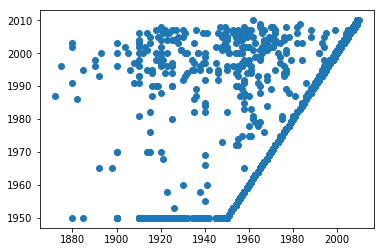

In [385]:
plt.scatter(df.YearBuilt, df.YearRemodAdd)

In [386]:
(df.YearRemodAdd-df.YearBuilt).any()<0

False

we can see 2 things- (1): theres a problem in data. no house was renovated before 1950. (2) all houses were renovated after they were built (which is a good thing)

i think we can get rid of yearbuilt

In [387]:
df.drop('YearBuilt', axis=1, inplace=True)

we can add age of house when sold as a variable

In [388]:
df['HouseAge']=df.YrSold-df.YearRemodAdd

In [389]:
df['HouseAge'].describe()

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: HouseAge, dtype: float64

theres a house that was renovated after sold. thats bad!. lets check it out.

In [390]:
print('renovated at:', df[df['HouseAge']<0].YearRemodAdd.values, 'sold on: ', df[df['HouseAge']<0].MoSold.values, '-' ,df[df['HouseAge']<0].YrSold.values)

renovated at: [2008] sold on:  [10] - [2007]


seems like a typo. lets change it to renovated at 2007. also lets check if test data have the same problem

In [391]:
df.loc[df[df['HouseAge']<0].index.tolist(),'YearRemodAdd']=2007

In [392]:
test[test.YearRemodAdd>test.YrSold].YrSold, test[test.YearRemodAdd>test.YrSold].YearRemodAdd 

(Series([], Name: YrSold, dtype: int64),
 Series([], Name: YearRemodAdd, dtype: int64))

once again lets fix that

In [393]:
test.loc[test[test.YearRemodAdd>test.YrSold].index, 'YearRemodAdd']=2007

# 4-6

In [394]:
df.groupby(['ExterQual', 'ExterCond']).Id.count().unstack()

ExterCond,Ex,Fa,Gd,Po,TA
ExterQual,,,,,
Ex,1.0,NaN,3.0,NaN,48.0
Fa,NaN,6.0,NaN,NaN,8.0
Gd,NaN,NaN,35.0,NaN,453.0
TA,2.0,22.0,108.0,1.0,773.0


In [395]:
Quality_scale={np.nan:0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [396]:
df.ExterQual=df.ExterQual.map(Quality_scale)

In [397]:
df.ExterCond=df.ExterCond.map(Quality_scale)

the basement is more tricky cause sometimes there's no basement. it will need a different approach, possibly by creating new variables.

I will create one new variable to sum all the bsmnt properties

In [398]:
df.loc[:,'BsmtQual':'TotalBsmtSF']

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,706,Unf,0,150,856
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,TA,Gd,No,ALQ,216,Unf,0,540,756
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145
5,Gd,TA,No,GLQ,732,Unf,0,64,796
6,Ex,TA,Av,GLQ,1369,Unf,0,317,1686
7,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107
8,TA,TA,No,Unf,0,Unf,0,952,952
9,TA,TA,No,GLQ,851,Unf,0,140,991


In [399]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [400]:
df.BsmtQual=df.BsmtQual.map(Quality_scale)
df.BsmtCond=df.BsmtCond.map(Quality_scale)

Quality_scale2={np.nan:0,'No':1, 'Mn':2, 'Av':3, 'Gd':4}

df.BsmtExposure=df.BsmtExposure.map(Quality_scale2)

Quality_scale3={np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

df.BsmtFinType1=df.BsmtFinType1.map(Quality_scale3)
df.BsmtFinType2=df.BsmtFinType2.map(Quality_scale3)


In [401]:
df.loc[:,'BsmtQual':'TotalBsmtSF'].isnull().any()

BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinSF1      False
BsmtFinType2    False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
dtype: bool

In [417]:
def total_basement_quality(df):
    if df.TotalBsmtSF!=0:
        base_score=df.BsmtQual*df.BsmtCond*df.BsmtExposure
        avg_score=df.BsmtFinType1*(df.BsmtFinSF1/df.TotalBsmtSF)+df.BsmtFinType2*(df.BsmtFinSF2/df.TotalBsmtSF)+(df.BsmtUnfSF/df.TotalBsmtSF)
        return base_score*avg_score*df.TotalBsmtSF
    

In [418]:
df['total_basement_quality']=df.apply(total_basement_quality, axis=1)

In [419]:
df.loc[:10,"BsmtQual":"TotalBsmtSF"]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,4,3,1,6,706,1,0,150,856
1,4,3,4,5,978,1,0,284,1262
2,4,3,2,6,486,1,0,434,920
3,3,4,1,5,216,1,0,540,756
4,4,3,3,6,655,1,0,490,1145
5,4,3,1,6,732,1,0,64,796
6,5,3,3,6,1369,1,0,317,1686
7,4,3,2,5,859,4,32,216,1107
8,3,3,1,1,0,1,0,952,952
9,3,3,1,6,851,1,0,140,991


In [420]:
df.loc[:10,'total_basement_quality']

0      52632.0
1     248352.0
2      80400.0
3      19440.0
4     159120.0
5      53472.0
6     383895.0
7     111336.0
8       8568.0
9      47214.0
10     25668.0
Name: total_basement_quality, dtype: float64

In [421]:
df.shape

(1460, 95)

In [423]:
df.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], axis=1, inplace=True)

In [424]:
df.shape

(1460, 86)

# 7-8

In [425]:
df.groupby('HeatingQC').Id.count()

HeatingQC
Ex    741
Fa     49
Gd    241
Po      1
TA    428
Name: Id, dtype: int64

In [428]:
df.HeatingQC=df.HeatingQC.map(Quality_scale)

In [431]:
df.KitchenQual=df.KitchenQual.map(Quality_scale)

# 9- for now stop this because of glib notes

Functional also.
GarageFinish the same.
GarageQual the same.
GarageCond the same.
Fence the same (but more complicated)
MiscFeature might be dropped.
MoSold and YrSold might be used to see if there is a time trend.

In [437]:
df.groupby('YrSold').Id.count()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: Id, dtype: int64

# things to do now

1. check if theres a time trend (there should be a complex one because of the 2008-9 economic crisis
2. check what is the best way to analyze the target(regular, log, sqrt, price per sf)
3. change OverallQual, OverallCond to categorical var's
4. try to add dummies for 2-bedrooms, 3-bedrooms and so on

In [456]:
df['temp']=df.apply(lambda x: str(x.YrSold)+'-'+str(x.MoSold), axis=1)

In [458]:
df['SaleDate']=pd.to_datetime(df['temp'])
df.drop('temp', axis=1, inplace=True)

In [460]:
sorted(df['SaleDate'])

[Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-01-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-02-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-01 00:00:00'),
 Timestamp('2006-03-

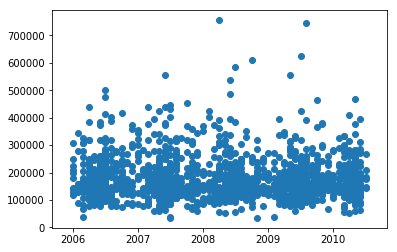

In [462]:
plt.scatter(sorted(df['SaleDate']), df.SalePrice)

In [464]:
df['Log_sale_price']=np.log(df.SalePrice)
df['squre_root_sale_price']=np.sqrt(df.SalePrice)
df['Price_per_sf']=df.SalePrice/df.GrLivArea

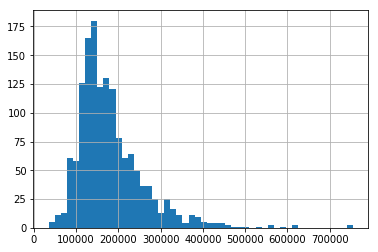

In [466]:
df['SalePrice'].hist(bins=50)

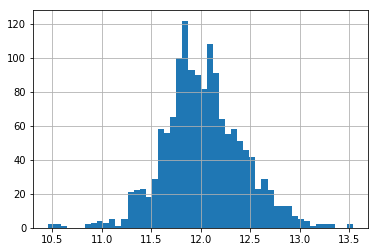

In [465]:
df['Log_sale_price'].hist(bins=50)

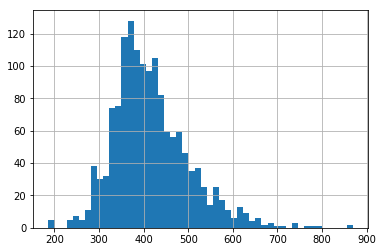

In [467]:
df['squre_root_sale_price'].hist(bins=50)

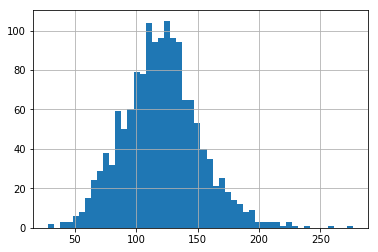

In [468]:
df['Price_per_sf'].hist(bins=50)

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


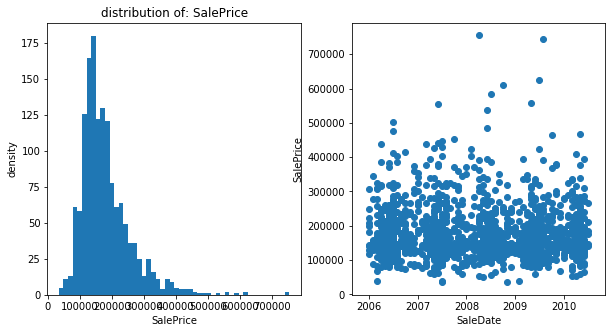

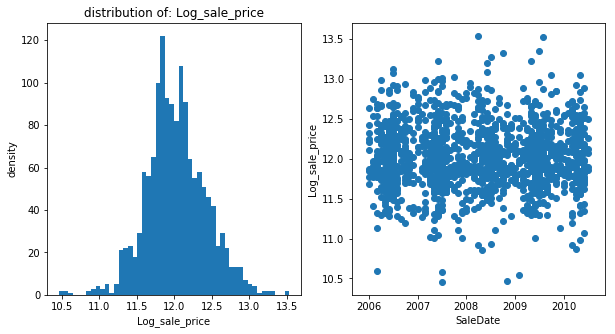

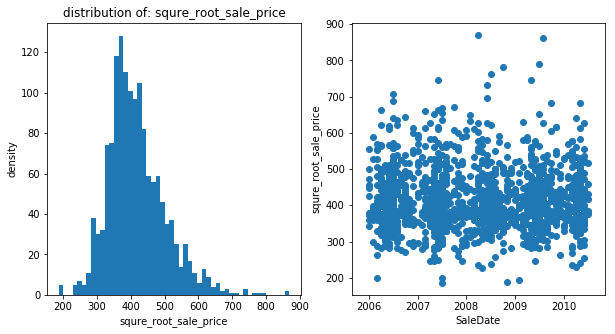

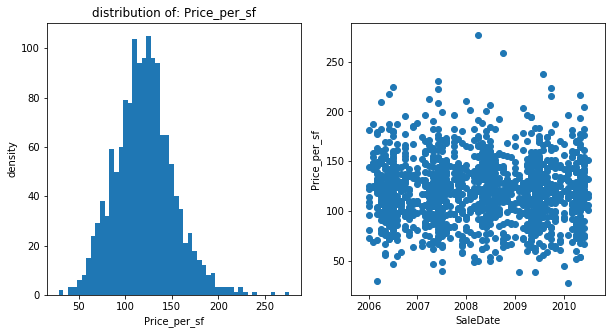

In [472]:
for c in ['SalePrice', 'Log_sale_price', 'squre_root_sale_price','Price_per_sf']:

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    ax.hist(df[c],bins=50)
    ax.set_title('distribution of: '+c )
    ax.set_xlabel(c)
    ax.set_ylabel('density')

    bx=fig.add_subplot(1,2,2)
    bx.scatter(sorted(df['SaleDate']), df[c])
    bx.set_xlabel('SaleDate')
    bx.set_ylabel(c)
    fig.show()

no obvious time trend. i will deal with that later

In [473]:
import scipy

In [476]:
scipy.stats.normaltest(df.SalePrice)[1]

2.283848353787728e-133

In [482]:
#'Log_sale_price', 'squre_root_sale_price','Price_per_sf'
scipy.stats.normaltest(df.Log_sale_price)[1]

2.89216582205235e-06

In [478]:
scipy.stats.normaltest(df.squre_root_sale_price)[1]

2.0670739363113531e-50

In [479]:
scipy.stats.normaltest(df.Price_per_sf)[1]

4.577737676056283e-13

non of our distributions are normal. but the log is closest to normal(cause the p-value is the largest). lets try also log_price for SF

In [483]:
df['log_saleprice_per_sf']=np.log(df['Price_per_sf'])

C:\Users\liort\Anaconda3\envs\py4dp\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


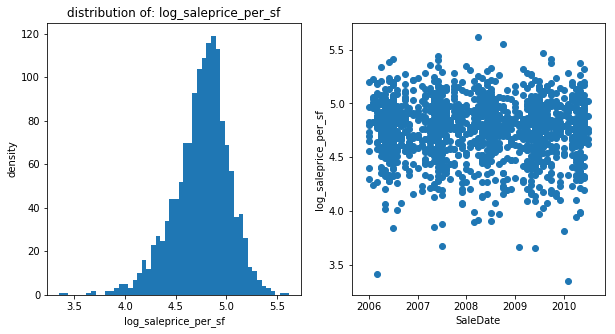

In [484]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.hist(df['log_saleprice_per_sf'],bins=50)
ax.set_title('distribution of: log_saleprice_per_sf' )
ax.set_xlabel('log_saleprice_per_sf')
ax.set_ylabel('density')

bx=fig.add_subplot(1,2,2)
bx.scatter(sorted(df['SaleDate']), df['log_saleprice_per_sf'])
bx.set_xlabel('SaleDate')
bx.set_ylabel('log_saleprice_per_sf')
fig.show()

In [485]:
scipy.stats.normaltest(df.log_saleprice_per_sf)[1]

1.2379259610036176e-31

nope, its not more normal than just log_price.

# change OverallQual, OverallCond to categorical var's

In [486]:
df.groupby('OverallQual').Id.count()

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: Id, dtype: int64

In [487]:
df.groupby('OverallCond').Id.count()

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: Id, dtype: int64

In [488]:
map_overall_to_cat={10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',
                    3:'Fair',2:'Poor',1:'Very Poor'}

In [489]:
df.OverallCond=df.OverallCond.map(map_overall_to_cat)
df.OverallQual=df.OverallQual.map(map_overall_to_cat)

# try to add dummies for 2-bedrooms, 3-bedrooms and so on

In [497]:
df.groupby('BedroomAbvGr').Id.count()

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

In [498]:
df=pd.concat([df,pd.get_dummies(df.BedroomAbvGr, prefix="br")], axis=1)

In [499]:
df.columns.tolist()

['Id',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice',
 '60_RL',
 '60_

In [ ]:
y=df.Log_sale_price
list_to_remove=['Log_sale_price', 'SalePrice','MoSold',
 'YrSold',
 'squre_root_sale_price',
 'Price_per_sf',
 'log_saleprice_per_sf]